In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=5cff8e47d2ede995346f54c4fb41ee53ff2ffe3a0cc55c54890baaa91a80a7df
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [3]:
import os
file_path = '/content/gdrive/MyDrive/603_project/Fire_Incident_Dispatch_Data_20231101.csv'
file_type = "csv"

In [4]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, TimestampType, IntegerType
from pyspark.sql.functions import col, sum
# Create a Spark session
spark = SparkSession.builder.appName("Fire_Incident_Dispatch").config("spark.sql.debug.maxToStringFields", 100).getOrCreate()


schema = StructType([
    StructField("STARFIRE_INCIDENT_ID", StringType(), True),
    StructField("INCIDENT_DATETIME", StringType(), True),
    StructField("ALARM_BOX_BOROUGH", StringType(), True),
    StructField("ALARM_BOX_NUMBER", StringType(), True),
    StructField("ALARM_BOX_LOCATION", StringType(), True),
    StructField("INCIDENT_BOROUGH", StringType(), True),
    StructField("ZIPCODE", StringType(), True),
    StructField("POLICEPRECINCT", StringType(), True),
    StructField("CITYCOUNCILDISTRICT", StringType(), True),
    StructField("COMMUNITYDISTRICT", StringType(), True),
    StructField("COMMUNITYSCHOOLDISTRICT", StringType(), True),
    StructField("CONGRESSIONALDISTRICT", StringType(), True),
    StructField("ALARM_SOURCE_DESCRIPTION", StringType(), True),
    StructField("ALARM_LEVEL_INDEX_DESCRIPTION", StringType(), True),
    StructField("HIGHEST_ALARM_LEVEL", StringType(), True),
    StructField("INCIDENT_CLASSIFICATION", StringType(), True),
    StructField("INCIDENT_CLASSIFICATION_GROUP", StringType(), True),
    StructField("DISPATCH_RESPONSE_SECONDS_QY", StringType(), True),
    StructField("FIRST_ASSIGNMENT_DATETIME", TimestampType(), True),
    StructField("FIRST_ACTIVATION_DATETIME", TimestampType(), True),
    StructField("FIRST_ON_SCENE_DATETIME", TimestampType(), True),
    StructField("INCIDENT_CLOSE_DATETIME", TimestampType(), True),
    StructField("VALID_DISPATCH_RSPNS_TIME_INDC", StringType(), True),
    StructField("VALID_INCIDENT_RSPNS_TIME_INDC", StringType(), True),
    StructField("INCIDENT_RESPONSE_SECONDS_QY", StringType(), True),
    StructField("INCIDENT_TRAVEL_TM_SECONDS_QY", StringType(), True),
    StructField("ENGINES_ASSIGNED_QUANTITY", StringType(), True),
    StructField("LADDERS_ASSIGNED_QUANTITY", StringType(), True),
    StructField("OTHER_UNITS_ASSIGNED_QUANTITY", StringType(), True)


])
# Load fire data from the specified CSV file
df_fire = spark.read.format(file_type).option("header", "true").option("delimiter", ",").option("encoding", "UTF-8").schema(schema).load(file_path)

# Create a temporary view for Spark SQL queries
df_fire.createOrReplaceTempView("fire_incident")


In [5]:
df_fire.schema

StructType([StructField('STARFIRE_INCIDENT_ID', StringType(), True), StructField('INCIDENT_DATETIME', StringType(), True), StructField('ALARM_BOX_BOROUGH', StringType(), True), StructField('ALARM_BOX_NUMBER', StringType(), True), StructField('ALARM_BOX_LOCATION', StringType(), True), StructField('INCIDENT_BOROUGH', StringType(), True), StructField('ZIPCODE', StringType(), True), StructField('POLICEPRECINCT', StringType(), True), StructField('CITYCOUNCILDISTRICT', StringType(), True), StructField('COMMUNITYDISTRICT', StringType(), True), StructField('COMMUNITYSCHOOLDISTRICT', StringType(), True), StructField('CONGRESSIONALDISTRICT', StringType(), True), StructField('ALARM_SOURCE_DESCRIPTION', StringType(), True), StructField('ALARM_LEVEL_INDEX_DESCRIPTION', StringType(), True), StructField('HIGHEST_ALARM_LEVEL', StringType(), True), StructField('INCIDENT_CLASSIFICATION', StringType(), True), StructField('INCIDENT_CLASSIFICATION_GROUP', StringType(), True), StructField('DISPATCH_RESPONSE

In [6]:
num_rows = df_fire.count()
num_cols = len(df_fire.columns)
print(f"Number of Rows: {num_rows}, Number of Columns: {num_cols}")


Number of Rows: 8691513, Number of Columns: 29


In [7]:
# Display the DataFrame
df_fire.show()


+--------------------+--------------------+--------------------+----------------+--------------------+--------------------+-------+--------------+-------------------+-----------------+-----------------------+---------------------+------------------------+-----------------------------+-------------------+-----------------------+-----------------------------+----------------------------+-------------------------+-------------------------+-----------------------+-----------------------+------------------------------+------------------------------+----------------------------+-----------------------------+-------------------------+-------------------------+-----------------------------+
|STARFIRE_INCIDENT_ID|   INCIDENT_DATETIME|   ALARM_BOX_BOROUGH|ALARM_BOX_NUMBER|  ALARM_BOX_LOCATION|    INCIDENT_BOROUGH|ZIPCODE|POLICEPRECINCT|CITYCOUNCILDISTRICT|COMMUNITYDISTRICT|COMMUNITYSCHOOLDISTRICT|CONGRESSIONALDISTRICT|ALARM_SOURCE_DESCRIPTION|ALARM_LEVEL_INDEX_DESCRIPTION|HIGHEST_ALARM_LEVEL|INC

#Data Cleaning

Checking for null values in each column


In [8]:
null_val = df_fire.select([sum(col(c).isNull().cast("int")).alias(c) for c in df_fire.columns])
null_val.show()

+--------------------+-----------------+-----------------+----------------+------------------+----------------+-------+--------------+-------------------+-----------------+-----------------------+---------------------+------------------------+-----------------------------+-------------------+-----------------------+-----------------------------+----------------------------+-------------------------+-------------------------+-----------------------+-----------------------+------------------------------+------------------------------+----------------------------+-----------------------------+-------------------------+-------------------------+-----------------------------+
|STARFIRE_INCIDENT_ID|INCIDENT_DATETIME|ALARM_BOX_BOROUGH|ALARM_BOX_NUMBER|ALARM_BOX_LOCATION|INCIDENT_BOROUGH|ZIPCODE|POLICEPRECINCT|CITYCOUNCILDISTRICT|COMMUNITYDISTRICT|COMMUNITYSCHOOLDISTRICT|CONGRESSIONALDISTRICT|ALARM_SOURCE_DESCRIPTION|ALARM_LEVEL_INDEX_DESCRIPTION|HIGHEST_ALARM_LEVEL|INCIDENT_CLASSIFICATION|INC

In [9]:
#Dropping columns FIRST_ASSIGNMENT_DATETIME,FIRST_ACTIVATION_DATETIME, FIRST_ON_SCENE_DATETIME,INCIDENT_CLOSE_DATETIME as we already have incident response time and dispacth response time we dont need these columns in further anaylsis
columns_to_drop = ["FIRST_ASSIGNMENT_DATETIME", "FIRST_ACTIVATION_DATETIME", "FIRST_ON_SCENE_DATETIME", "INCIDENT_CLOSE_DATETIME"]
df_fire = df_fire.drop(*columns_to_drop)

In [10]:
#Dropping communityschooldistrict, COMMUNITYDISTRICT,CITYCOUNCILDISTRICT, CONGRESSIONALDISTRICT columns as they as just district numbers we already have location borough and zipcode columns to draw insights about locations
columns_to_drop = ["COMMUNITYSCHOOLDISTRICT", "COMMUNITYDISTRICT", "CITYCOUNCILDISTRICT", "CONGRESSIONALDISTRICT"]
df_fire = df_fire.drop(*columns_to_drop)

In [11]:
from pyspark.sql.functions import when, col

# Calculate mode values for specific columns
zipcode_mode = df_fire.groupBy('ZIPCODE').count().orderBy(col('count').desc()).collect()[1][0]
policeprecinct_mode = df_fire.groupBy('POLICEPRECINCT').count().orderBy(col('count').desc()).collect()[1][0]
starfire_incident_id_mode = df_fire.groupBy('STARFIRE_INCIDENT_ID').count().orderBy(col('count').desc()).limit(1).collect()[0][0]
alarm_box_location_mode = df_fire.groupBy('ALARM_BOX_LOCATION').count().orderBy(col('count').desc()).collect()[0][0]

# Replacing null values with mode values
df_fire = df_fire.fillna({'ZIPCODE': zipcode_mode, 'POLICEPRECINCT': policeprecinct_mode,'ALARM_BOX_LOCATION' : alarm_box_location_mode})



In [12]:
nv = df_fire.select([sum(col(c).isNull().cast("int")).alias(c) for c in df_fire.columns])
nv.show()

+--------------------+-----------------+-----------------+----------------+------------------+----------------+-------+--------------+------------------------+-----------------------------+-------------------+-----------------------+-----------------------------+----------------------------+------------------------------+------------------------------+----------------------------+-----------------------------+-------------------------+-------------------------+-----------------------------+
|STARFIRE_INCIDENT_ID|INCIDENT_DATETIME|ALARM_BOX_BOROUGH|ALARM_BOX_NUMBER|ALARM_BOX_LOCATION|INCIDENT_BOROUGH|ZIPCODE|POLICEPRECINCT|ALARM_SOURCE_DESCRIPTION|ALARM_LEVEL_INDEX_DESCRIPTION|HIGHEST_ALARM_LEVEL|INCIDENT_CLASSIFICATION|INCIDENT_CLASSIFICATION_GROUP|DISPATCH_RESPONSE_SECONDS_QY|VALID_DISPATCH_RSPNS_TIME_INDC|VALID_INCIDENT_RSPNS_TIME_INDC|INCIDENT_RESPONSE_SECONDS_QY|INCIDENT_TRAVEL_TM_SECONDS_QY|ENGINES_ASSIGNED_QUANTITY|LADDERS_ASSIGNED_QUANTITY|OTHER_UNITS_ASSIGNED_QUANTITY|
+-------

In [37]:
df_fire.columns

['STARFIRE_INCIDENT_ID',
 'INCIDENT_DATETIME',
 'ALARM_BOX_BOROUGH',
 'ALARM_BOX_NUMBER',
 'ALARM_BOX_LOCATION',
 'INCIDENT_BOROUGH',
 'ZIPCODE',
 'POLICEPRECINCT',
 'ALARM_SOURCE_DESCRIPTION',
 'ALARM_LEVEL_INDEX_DESCRIPTION',
 'HIGHEST_ALARM_LEVEL',
 'INCIDENT_CLASSIFICATION',
 'INCIDENT_CLASSIFICATION_GROUP',
 'DISPATCH_RESPONSE_SECONDS_QY',
 'VALID_DISPATCH_RSPNS_TIME_INDC',
 'VALID_INCIDENT_RSPNS_TIME_INDC',
 'INCIDENT_RESPONSE_SECONDS_QY',
 'INCIDENT_TRAVEL_TM_SECONDS_QY',
 'ENGINES_ASSIGNED_QUANTITY',
 'LADDERS_ASSIGNED_QUANTITY',
 'OTHER_UNITS_ASSIGNED_QUANTITY',
 'hour',
 'day_of_week',
 'month',
 'year']

In [13]:
df_fire.show()

+--------------------+--------------------+--------------------+----------------+--------------------+--------------------+-------+--------------+------------------------+-----------------------------+-------------------+-----------------------+-----------------------------+----------------------------+------------------------------+------------------------------+----------------------------+-----------------------------+-------------------------+-------------------------+-----------------------------+
|STARFIRE_INCIDENT_ID|   INCIDENT_DATETIME|   ALARM_BOX_BOROUGH|ALARM_BOX_NUMBER|  ALARM_BOX_LOCATION|    INCIDENT_BOROUGH|ZIPCODE|POLICEPRECINCT|ALARM_SOURCE_DESCRIPTION|ALARM_LEVEL_INDEX_DESCRIPTION|HIGHEST_ALARM_LEVEL|INCIDENT_CLASSIFICATION|INCIDENT_CLASSIFICATION_GROUP|DISPATCH_RESPONSE_SECONDS_QY|VALID_DISPATCH_RSPNS_TIME_INDC|VALID_INCIDENT_RSPNS_TIME_INDC|INCIDENT_RESPONSE_SECONDS_QY|INCIDENT_TRAVEL_TM_SECONDS_QY|ENGINES_ASSIGNED_QUANTITY|LADDERS_ASSIGNED_QUANTITY|OTHER_UNITS_ASS

In [14]:
#Converting  columns with date and time information to more usable format.
from pyspark.sql.functions import col,to_timestamp
df_fire = df_fire.withColumn("INCIDENT_DATETIME", to_timestamp(df_fire["INCIDENT_DATETIME"], "MM/dd/yyyy hh:mm:ss a"))

df_fire.show()



+--------------------+-------------------+--------------------+----------------+--------------------+--------------------+-------+--------------+------------------------+-----------------------------+-------------------+-----------------------+-----------------------------+----------------------------+------------------------------+------------------------------+----------------------------+-----------------------------+-------------------------+-------------------------+-----------------------------+
|STARFIRE_INCIDENT_ID|  INCIDENT_DATETIME|   ALARM_BOX_BOROUGH|ALARM_BOX_NUMBER|  ALARM_BOX_LOCATION|    INCIDENT_BOROUGH|ZIPCODE|POLICEPRECINCT|ALARM_SOURCE_DESCRIPTION|ALARM_LEVEL_INDEX_DESCRIPTION|HIGHEST_ALARM_LEVEL|INCIDENT_CLASSIFICATION|INCIDENT_CLASSIFICATION_GROUP|DISPATCH_RESPONSE_SECONDS_QY|VALID_DISPATCH_RSPNS_TIME_INDC|VALID_INCIDENT_RSPNS_TIME_INDC|INCIDENT_RESPONSE_SECONDS_QY|INCIDENT_TRAVEL_TM_SECONDS_QY|ENGINES_ASSIGNED_QUANTITY|LADDERS_ASSIGNED_QUANTITY|OTHER_UNITS_ASSIG

In [15]:
#Changing string data types to int
int_col=["ZIPCODE","POLICEPRECINCT","DISPATCH_RESPONSE_SECONDS_QY","INCIDENT_RESPONSE_SECONDS_QY","INCIDENT_TRAVEL_TM_SECONDS_QY","ENGINES_ASSIGNED_QUANTITY","LADDERS_ASSIGNED_QUANTITY","OTHER_UNITS_ASSIGNED_QUANTITY"]
for i in int_col:
    df_fire = df_fire.withColumn(i, col(i).cast("int"))

df_fire.show()

+--------------------+-------------------+--------------------+----------------+--------------------+--------------------+-------+--------------+------------------------+-----------------------------+-------------------+-----------------------+-----------------------------+----------------------------+------------------------------+------------------------------+----------------------------+-----------------------------+-------------------------+-------------------------+-----------------------------+
|STARFIRE_INCIDENT_ID|  INCIDENT_DATETIME|   ALARM_BOX_BOROUGH|ALARM_BOX_NUMBER|  ALARM_BOX_LOCATION|    INCIDENT_BOROUGH|ZIPCODE|POLICEPRECINCT|ALARM_SOURCE_DESCRIPTION|ALARM_LEVEL_INDEX_DESCRIPTION|HIGHEST_ALARM_LEVEL|INCIDENT_CLASSIFICATION|INCIDENT_CLASSIFICATION_GROUP|DISPATCH_RESPONSE_SECONDS_QY|VALID_DISPATCH_RSPNS_TIME_INDC|VALID_INCIDENT_RSPNS_TIME_INDC|INCIDENT_RESPONSE_SECONDS_QY|INCIDENT_TRAVEL_TM_SECONDS_QY|ENGINES_ASSIGNED_QUANTITY|LADDERS_ASSIGNED_QUANTITY|OTHER_UNITS_ASSIG

In [16]:
#drop duplicate rows
df_fire=df_fire.dropDuplicates()
df_fire.show()

+--------------------+-------------------+-----------------+----------------+--------------------+----------------+-------+--------------+------------------------+-----------------------------+-------------------+-----------------------+-----------------------------+----------------------------+------------------------------+------------------------------+----------------------------+-----------------------------+-------------------------+-------------------------+-----------------------------+
|STARFIRE_INCIDENT_ID|  INCIDENT_DATETIME|ALARM_BOX_BOROUGH|ALARM_BOX_NUMBER|  ALARM_BOX_LOCATION|INCIDENT_BOROUGH|ZIPCODE|POLICEPRECINCT|ALARM_SOURCE_DESCRIPTION|ALARM_LEVEL_INDEX_DESCRIPTION|HIGHEST_ALARM_LEVEL|INCIDENT_CLASSIFICATION|INCIDENT_CLASSIFICATION_GROUP|DISPATCH_RESPONSE_SECONDS_QY|VALID_DISPATCH_RSPNS_TIME_INDC|VALID_INCIDENT_RSPNS_TIME_INDC|INCIDENT_RESPONSE_SECONDS_QY|INCIDENT_TRAVEL_TM_SECONDS_QY|ENGINES_ASSIGNED_QUANTITY|LADDERS_ASSIGNED_QUANTITY|OTHER_UNITS_ASSIGNED_QUANTITY|


#Visualizations

##1.Which borough has the highest number of incidents

In [17]:
from pyspark.sql.functions import count
highest_no=df_fire.groupBy("INCIDENT_BOROUGH").agg(count("INCIDENT_BOROUGH").alias("BOROUGH_COUNT")).orderBy("BOROUGH_COUNT")
highest_no.show()

+--------------------+-------------+
|    INCIDENT_BOROUGH|BOROUGH_COUNT|
+--------------------+-------------+
|RICHMOND / STATEN...|       442956|
|              QUEENS|      1728764|
|               BRONX|      1750115|
|           MANHATTAN|      2305156|
|            BROOKLYN|      2464521|
+--------------------+-------------+



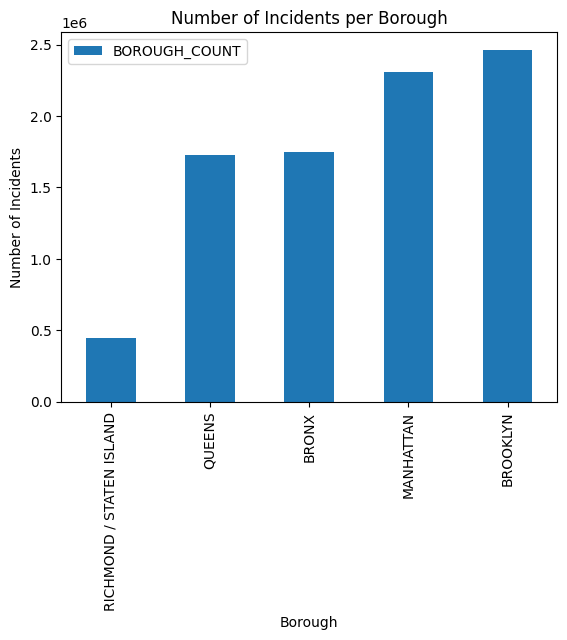

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the PySpark DataFrame to a Pandas DataFrame for visualization
highest_no_pandas = highest_no.toPandas()

# Plot the data
highest_no_pandas.plot(kind='bar', x='INCIDENT_BOROUGH', y='BOROUGH_COUNT', legend=True)
plt.title('Number of Incidents per Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Incidents')
plt.show()


From the above visualization we can see most of the incidents are reported from 'BROOKLYN' neighborhood.

##Average response time for each classification group based on the type of alarm received


In [19]:
from pyspark.sql.functions import mean
df=df_fire.groupBy("INCIDENT_CLASSIFICATION_GROUP","HIGHEST_ALARM_LEVEL")
avg_res = df.agg(mean('INCIDENT_RESPONSE_SECONDS_QY').alias('AVG_RESPONSE_TIME'))
avg_res.show()

+-----------------------------+--------------------+------------------+
|INCIDENT_CLASSIFICATION_GROUP| HIGHEST_ALARM_LEVEL| AVG_RESPONSE_TIME|
+-----------------------------+--------------------+------------------+
|         NonMedical Emerge...|       Seventh Alarm|311.90786516853933|
|          NonStructural Fires|         Third Alarm|388.02941176470586|
|                 Medical MFAs|         First Alarm| 280.7443314330137|
|             Structural Fires|       Seventh Alarm| 231.5409567943301|
|          NonStructural Fires|   All Hands Working|313.09854771784234|
|          Medical Emergencies|         First Alarm|214.92638149665518|
|          NonStructural Fires|         First Alarm|267.07144139029793|
|          NonStructural Fires|        Second Alarm| 349.4945054945055|
|          Medical Emergencies|       Seventh Alarm| 313.5934065934066|
|         NonMedical Emerge...|     Complaint/Still|150.20967741935485|
|         NonMedical Emerge...|        Second Alarm| 353.4035087

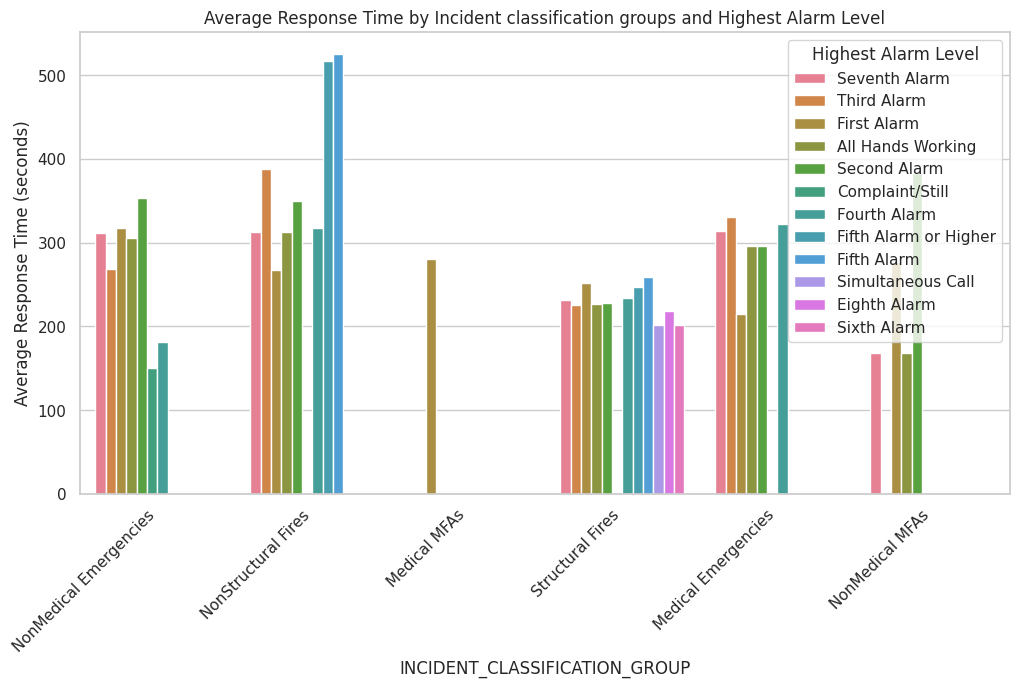

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the PySpark DataFrame to a Pandas DataFrame
Avg_res_pandas= avg_res.toPandas()

# Set the style for the plot using Seaborn
sns.set(style="whitegrid")

# Create a grouped bar chart using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(
    data=Avg_res_pandas,
    x='INCIDENT_CLASSIFICATION_GROUP',
    y='AVG_RESPONSE_TIME',
    hue='HIGHEST_ALARM_LEVEL',
    palette="husl"
)

# Set chart title and labels
plt.title('Average Response Time by Incident classification groups and Highest Alarm Level')
plt.xlabel('INCIDENT_CLASSIFICATION_GROUP')
plt.ylabel('Average Response Time (seconds)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a legend
plt.legend(title='Highest Alarm Level', loc='upper right')

# Display the chart
plt.show()


The graph above shows the average response time for each incident classification group based on the type of alarm received. The response time for each class varies depending on the level of alarm received; if the level of alarm is higher, the response time is low (i.e. fast).



##Visualizing the incidents by hours

In [21]:
from pyspark.sql.functions import hour, count, col

df_fire = df_fire.withColumn("hour", hour("INCIDENT_DATETIME"))
# Group by hour and count incidents
incidents_hour = df_fire.groupBy("INCIDENT_BOROUGH", "hour").agg(count("*").alias("incident_count_hour"))
incidents_hour.show()



+--------------------+----+-------------------+
|    INCIDENT_BOROUGH|hour|incident_count_hour|
+--------------------+----+-------------------+
|RICHMOND / STATEN...|   7|              14314|
|            BROOKLYN|   5|              47046|
|           MANHATTAN|   3|              49506|
|            BROOKLYN|   8|              95847|
|              QUEENS|   1|              44535|
|               BRONX|  18|             100467|
|               BRONX|  12|              84462|
|RICHMOND / STATEN...|  14|              25654|
|            BROOKLYN|  17|             142319|
|           MANHATTAN|  18|             128886|
|               BRONX|  16|              96312|
|            BROOKLYN|  13|             127994|
|               BRONX|  23|              74790|
|            BROOKLYN|   0|              81546|
|           MANHATTAN|   5|              44165|
|RICHMOND / STATEN...|  17|              27203|
|               BRONX|  11|              82071|
|RICHMOND / STATEN...|  22|             

<ipython-input-22-fb28b4d8eb7c>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(boroughs))


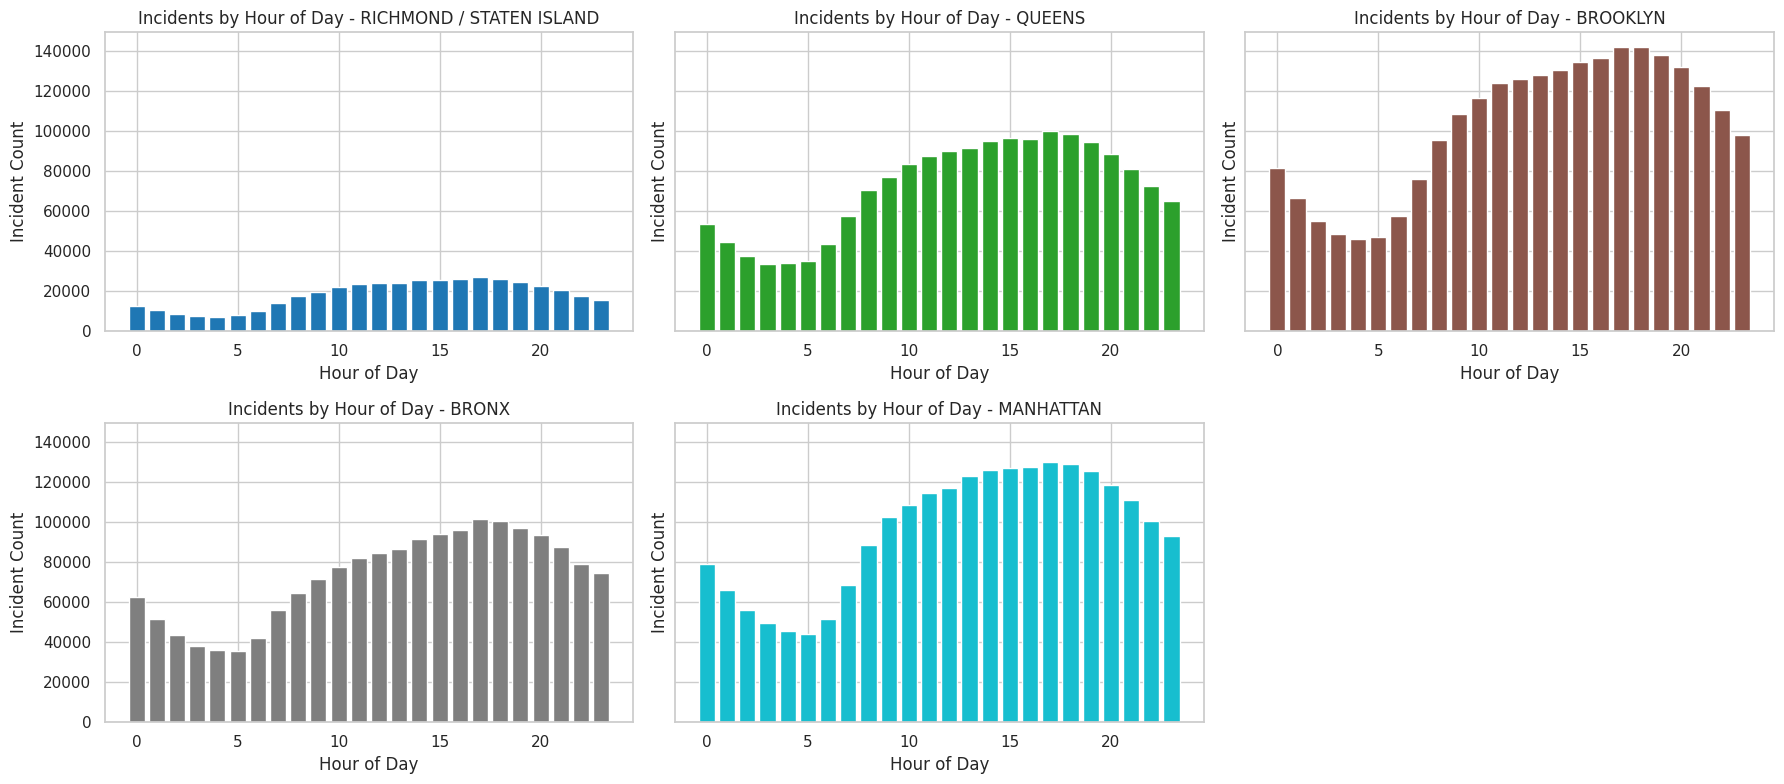

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Get a list of unique boroughs
boroughs = df_fire.select("INCIDENT_BOROUGH").distinct().rdd.flatMap(lambda x: x).collect()

# Defining the color map
colors = plt.cm.get_cmap('tab10', len(boroughs))

# Create subplots for each borough using bar charts
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 8), sharey=True)

for i in range(2):
    for j in range(3):
        index = i * 3 + j
        if index < len(boroughs):
            borough_data = incidents_hour.filter(incidents_hour["INCIDENT_BOROUGH"] == boroughs[index]).toPandas()
            # Plot bar chart for incidents by hour for the current borough
            axs[i, j].bar(borough_data["hour"], borough_data["incident_count_hour"], color=colors(index))
            axs[i, j].set_title(f'Incidents by Hour of Day - {boroughs[index]}')
            axs[i, j].set_xlabel('Hour of Day')
            axs[i, j].set_ylabel('Incident Count')
        else:
            axs[i, j].remove()

plt.tight_layout()
plt.show()


Based on the above visualizations, we can see that more incidents occur between 5 and 6 p.m.

##Visualizing the incidents by the week

In [23]:
from pyspark.sql.functions import dayofweek, count, col , date_format
#creating a newcoloumn day of week
df_fire = df_fire.withColumn("day_of_week", date_format("INCIDENT_DATETIME","EEEE"))

# Group by hour and count incidents
incidents_day = df_fire.groupBy("INCIDENT_BOROUGH", "day_of_week").agg(count("*").alias("incident_count_day"))
incidents_day.show()



+--------------------+-----------+------------------+
|    INCIDENT_BOROUGH|day_of_week|incident_count_day|
+--------------------+-----------+------------------+
|               BRONX|   Thursday|            243238|
|           MANHATTAN|   Saturday|            339787|
|            BROOKLYN|   Thursday|            347741|
|              QUEENS|  Wednesday|            244545|
|              QUEENS|     Sunday|            245363|
|RICHMOND / STATEN...|    Tuesday|             62468|
|RICHMOND / STATEN...|   Saturday|             64404|
|              QUEENS|   Saturday|            250169|
|RICHMOND / STATEN...|  Wednesday|             63708|
|            BROOKLYN|    Tuesday|            347764|
|               BRONX|    Tuesday|            245719|
|           MANHATTAN|     Friday|            344236|
|           MANHATTAN|  Wednesday|            327653|
|               BRONX|  Wednesday|            244150|
|              QUEENS|   Thursday|            243981|
|RICHMOND / STATEN...|     F

<ipython-input-24-472e059da292>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(boroughs))


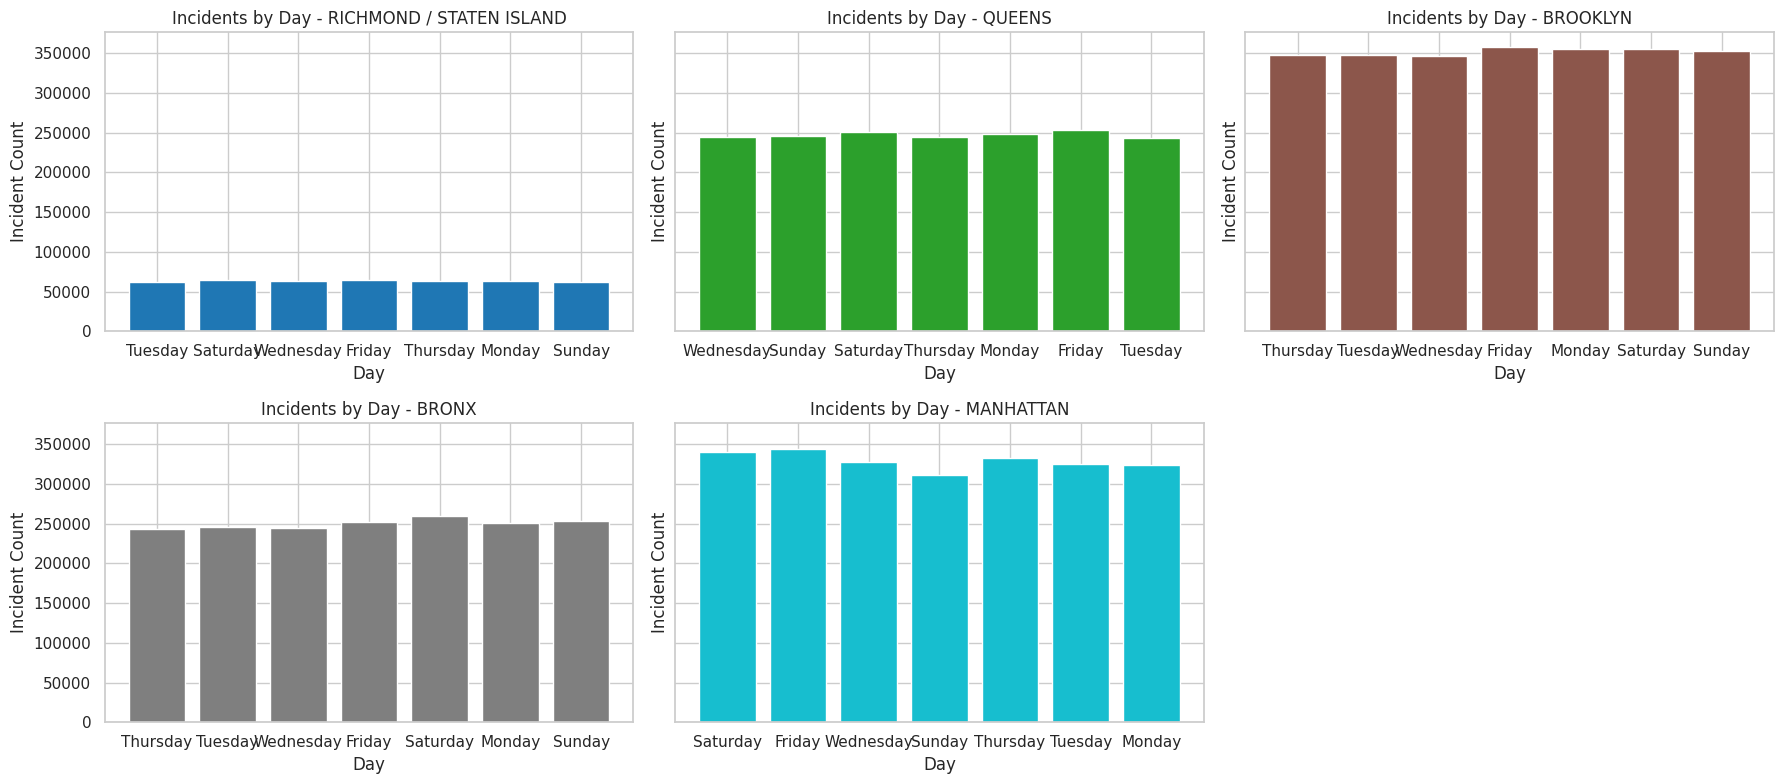

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Get a list of unique boroughs
boroughs = df_fire.select("INCIDENT_BOROUGH").distinct().rdd.flatMap(lambda x: x).collect()

colors = plt.cm.get_cmap('tab10', len(boroughs))
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 8), sharey=True)

for i in range(2):
    for j in range(3):
        index = i * 3 + j
        if index < len(boroughs):
            borough_data = incidents_day.filter(incidents_hour["INCIDENT_BOROUGH"] == boroughs[index]).toPandas()
            # Plot bar chart for incidents by day for the current borough
            axs[i, j].bar(borough_data["day_of_week"], borough_data["incident_count_day"], color=colors(index))
            axs[i, j].set_title(f'Incidents by Day - {boroughs[index]}')
            axs[i, j].set_xlabel('Day')
            axs[i, j].set_ylabel('Incident Count')
        else:
            axs[i, j].remove()

plt.tight_layout()
plt.show()


Based on the graphs above, we can conclude that the day of the week, weekday or weekend, has no effect on incidents across the boroughs.



##Visualizing the incidents by month

In [25]:
from pyspark.sql.functions import count, col,date_format

#creating a new column month
df_fire = df_fire.withColumn("month", date_format("INCIDENT_DATETIME","MMM"))

# Group by hour and count incidents
incidents_month = df_fire.groupBy("INCIDENT_BOROUGH", "month").agg(count("*").alias("incident_count_month"))
incidents_month.show()



+--------------------+-----+--------------------+
|    INCIDENT_BOROUGH|month|incident_count_month|
+--------------------+-----+--------------------+
|RICHMOND / STATEN...|  Jun|               39053|
|            BROOKLYN|  Jul|              226690|
|           MANHATTAN|  Mar|              183568|
|              QUEENS|  Jun|              150388|
|            BROOKLYN|  Feb|              192176|
|RICHMOND / STATEN...|  Apr|               35323|
|RICHMOND / STATEN...|  Oct|               37002|
|              QUEENS|  Jul|              161036|
|              QUEENS|  Mar|              140700|
|               BRONX|  Jan|              151357|
|               BRONX|  Feb|              133515|
|RICHMOND / STATEN...|  Jan|               37491|
|           MANHATTAN|  Oct|              195417|
|           MANHATTAN|  Apr|              181181|
|RICHMOND / STATEN...|  Aug|               37668|
|           MANHATTAN|  Dec|              187465|
|              QUEENS|  Oct|              146179|


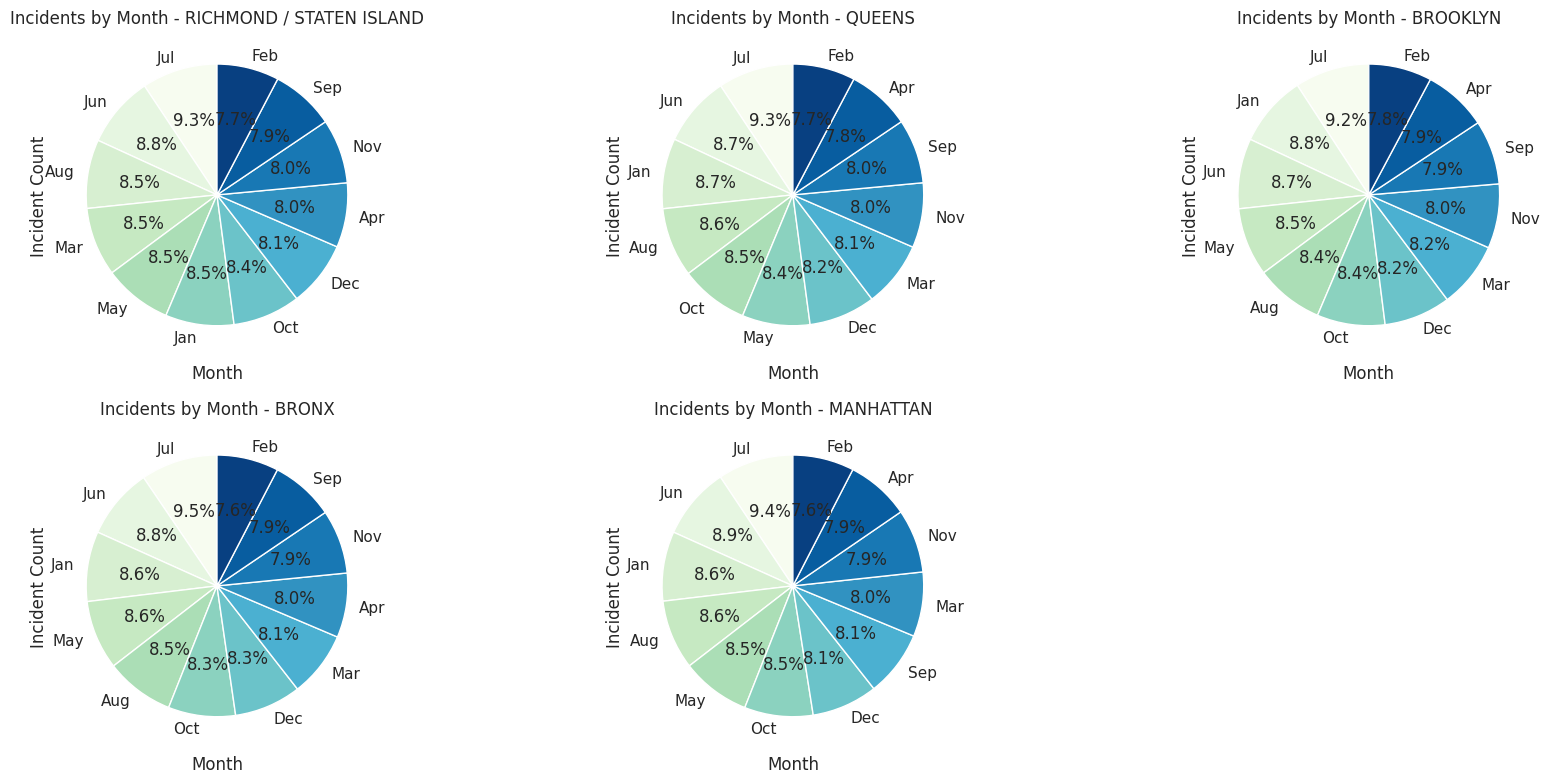

In [26]:
import matplotlib.pyplot as plt
import numpy as np

boroughs = df_fire.select("INCIDENT_BOROUGH").distinct().rdd.flatMap(lambda x: x).collect()

# Create subplots for each borough using bar charts
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 8), sharey=True)

for i in range(2):
    for j in range(3):
        index = i * 3 + j
        if index < len(boroughs):
            # Filter incidents for the current borough
            borough_data = incidents_month.filter(incidents_hour["INCIDENT_BOROUGH"] == boroughs[index]).toPandas()

            # Sort data by percentage in descending order
            sorted_data = borough_data.sort_values(by="incident_count_month", ascending=False)

            # Plot pie chart for incidents by month for the current borough
            axs[i, j].pie(sorted_data["incident_count_month"], labels=sorted_data["month"], autopct='%1.1f%%', startangle=90, colors=plt.cm.GnBu(np.linspace(0, 1, len(sorted_data))))
            axs[i, j].set_title(f'Incidents by Month - {boroughs[index]}')
            axs[i, j].set_xlabel('Month')
            axs[i, j].set_ylabel('Incident Count')

        else:
            axs[i, j].remove()

plt.tight_layout()
plt.show()


According to the graphs above, the month of July has the highest number of incidents across all boroughs.


##Top 3 most identified type of incident classification groups in all the broughs where data is collected

In [27]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.window import Window


# Group by borough and classification group, and calculate the count of incidents
borough_class_count = df_fire.groupBy("INCIDENT_BOROUGH", "INCIDENT_CLASSIFICATION_GROUP").agg(F.count("*").alias("count"))

# Define a window specification partitioned by borough and ordered by the count of incidents in descending order
w = Window.partitionBy('INCIDENT_BOROUGH').orderBy(F.desc('count'))

# Add a rank column to the DataFrame based on the window specification
top_class_per_borough = (
    borough_class_count
    .withColumn('rank', F.rank().over(w))
    .filter(F.col('rank').between(1, 3))
    .select(['INCIDENT_BOROUGH', 'INCIDENT_CLASSIFICATION_GROUP', 'count'])
)

# Display the resulting DataFrame
top_class_per_borough.show()

+--------------------+-----------------------------+-------+
|    INCIDENT_BOROUGH|INCIDENT_CLASSIFICATION_GROUP|  count|
+--------------------+-----------------------------+-------+
|               BRONX|          Medical Emergencies| 760637|
|               BRONX|         NonMedical Emerge...| 739671|
|               BRONX|             Structural Fires| 100866|
|            BROOKLYN|          Medical Emergencies|1116594|
|            BROOKLYN|         NonMedical Emerge...|1003392|
|            BROOKLYN|             Structural Fires| 144732|
|           MANHATTAN|          Medical Emergencies|1049095|
|           MANHATTAN|         NonMedical Emerge...| 990021|
|           MANHATTAN|             Structural Fires| 104763|
|              QUEENS|          Medical Emergencies| 795321|
|              QUEENS|         NonMedical Emerge...| 679823|
|              QUEENS|             Structural Fires|  89060|
|RICHMOND / STATEN...|         NonMedical Emerge...| 187445|
|RICHMOND / STATEN...|  

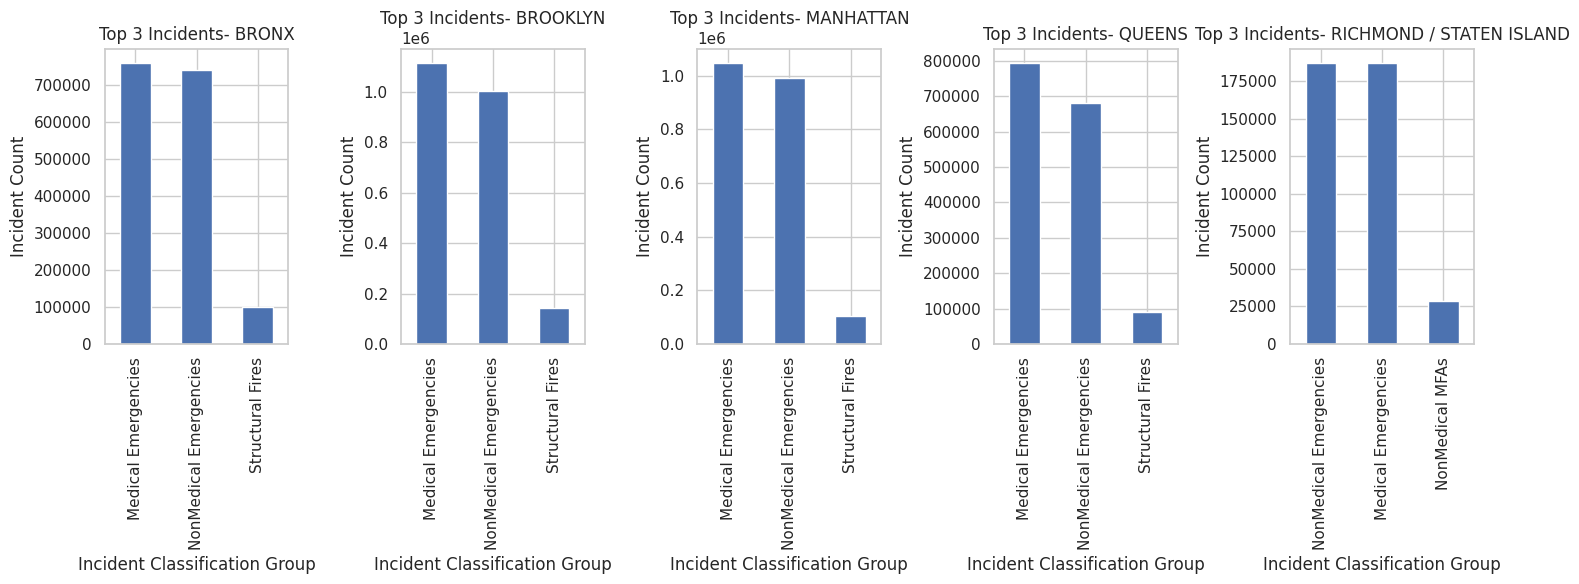

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert PySpark DataFrame to Pandas DataFrame for plotting
top_class_per_borough_df = top_class_per_borough.toPandas()

# Get a list of unique boroughs
boroughs = top_class_per_borough_df['INCIDENT_BOROUGH'].unique()

# Plotting
fig, axs = plt.subplots(1, len(boroughs), figsize=(15, 6))  # Use 1 row and len(boroughs) columns

for i, borough in enumerate(boroughs):
    # Filter data for the current borough
    borough_data = top_class_per_borough_df[top_class_per_borough_df['INCIDENT_BOROUGH'] == borough]

    # Plot bar chart for the current borough
    ax = axs[i]
    borough_data.plot(x='INCIDENT_CLASSIFICATION_GROUP', y='count', kind='bar', ax=ax, legend=False)
    ax.set_ylabel('Incident Count')
    ax.set_title(f'Top 3 Incidents- {borough}')
    ax.set_xlabel('Incident Classification Group')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


The graphs above show that medical and nonmedical emergencies have a higher incident count than structural fires across all boroughs.


##Understanding the distribution of incidents across different alarm sources and incident classification groups

In [29]:
alarm_source_incident_group = df_fire.groupBy("ALARM_SOURCE_DESCRIPTION", "INCIDENT_CLASSIFICATION_GROUP") \
    .agg(count("*").alias("incident_count")) \
    .sort("incident_count", ascending=False)

alarm_source_incident_group.show()


+------------------------+-----------------------------+--------------+
|ALARM_SOURCE_DESCRIPTION|INCIDENT_CLASSIFICATION_GROUP|incident_count|
+------------------------+-----------------------------+--------------+
|        EMS Link/Medical|          Medical Emergencies|       1944557|
|         PD Link/Medical|          Medical Emergencies|       1801734|
|                   Phone|         NonMedical Emerge...|       1427547|
|                 UCT/911|         NonMedical Emerge...|       1181080|
|      Private Fire Alarm|         NonMedical Emerge...|        590715|
|                  Verbal|         NonMedical Emerge...|        204704|
|                   Phone|             Structural Fires|        161197|
|                 UCT/911|             Structural Fires|        150843|
|                   Phone|          NonStructural Fires|        145166|
|      Private Fire Alarm|             Structural Fires|        143147|
|                 UCT/911|          NonStructural Fires|        

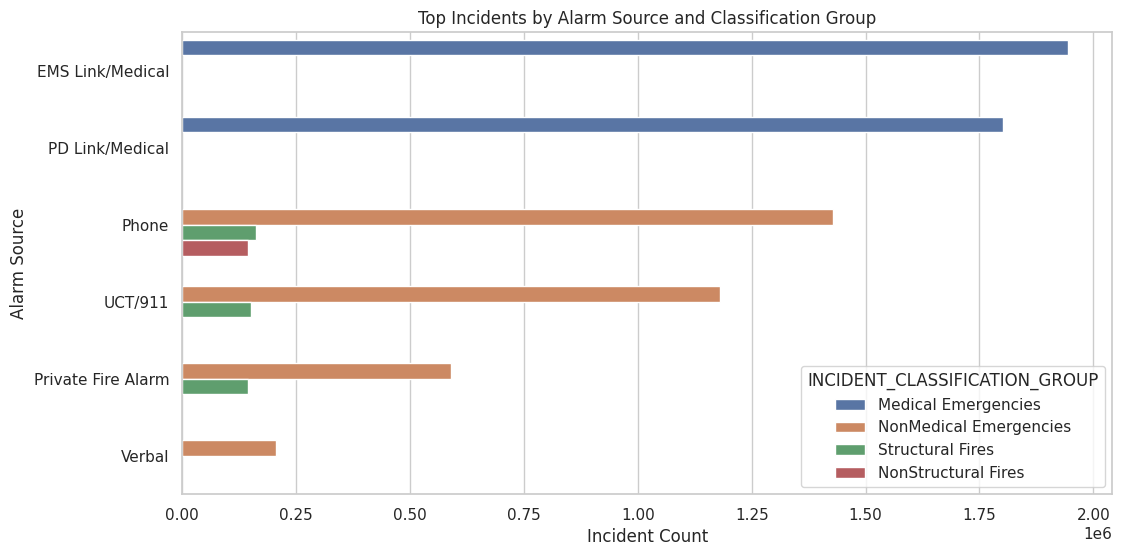

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

alarm_source_incident_pd = alarm_source_incident_group.toPandas()
# Get top incidents by count
top_incidents = alarm_source_incident_pd.nlargest(10, 'incident_count')

# Plot a bar chart to visualize top incidents
plt.figure(figsize=(12, 6))
sns.barplot(x='incident_count', y='ALARM_SOURCE_DESCRIPTION', hue='INCIDENT_CLASSIFICATION_GROUP', data=top_incidents)
plt.title('Top Incidents by Alarm Source and Classification Group')
plt.xlabel('Incident Count')
plt.ylabel('Alarm Source')
plt.show()






We can conclude from the graph above that medical emergencies and non-medical emergencies have occurred the most and that the information was received by EMS or PD Link/medical.



##To analyze trends in incident count and average response time over the years

In [31]:
from pyspark.sql.functions import year, month, dayofweek, avg

# Extract year from INCIDENT_DATETIME
df_fire = df_fire.withColumn('year', year('INCIDENT_DATETIME'))

# Group by year and calculate incident count and average response time
incident_trends = df_fire.groupBy('year').agg({'STARFIRE_INCIDENT_ID': 'count', 'INCIDENT_RESPONSE_SECONDS_QY': 'avg'}\
    ).withColumnRenamed('count(STARFIRE_INCIDENT_ID)', 'incident_count').withColumnRenamed('avg(INCIDENT_RESPONSE_SECONDS_QY)', 'avg_response_time_seconds')

incident_trends.show()



+----+-------------------------+--------------+
|year|avg_response_time_seconds|incident_count|
+----+-------------------------+--------------+
|2007|       267.38638255975786|        493617|
|2018|        273.3631152251682|        619448|
|2015|        262.6451774198814|        581981|
|2006|        271.5357900453973|        487915|
|2013|       258.20016150976153|        479208|
|2014|       264.47142159069483|        519798|
|2019|        258.9826940803198|        515315|
|2020|       268.20794876061177|        534901|
|2012|        259.1478959835615|        496883|
|2009|       254.20476961918789|        475300|
|2016|         261.937322594198|        585522|
|2005|       284.48836238644736|        488760|
|2010|         261.482794935557|        509908|
|2011|       259.18827220903773|        490476|
|2008|        256.5531556259865|        475801|
|2017|        258.0172770488492|        589221|
|2021|       267.94537730472774|        347438|
+----+-------------------------+--------

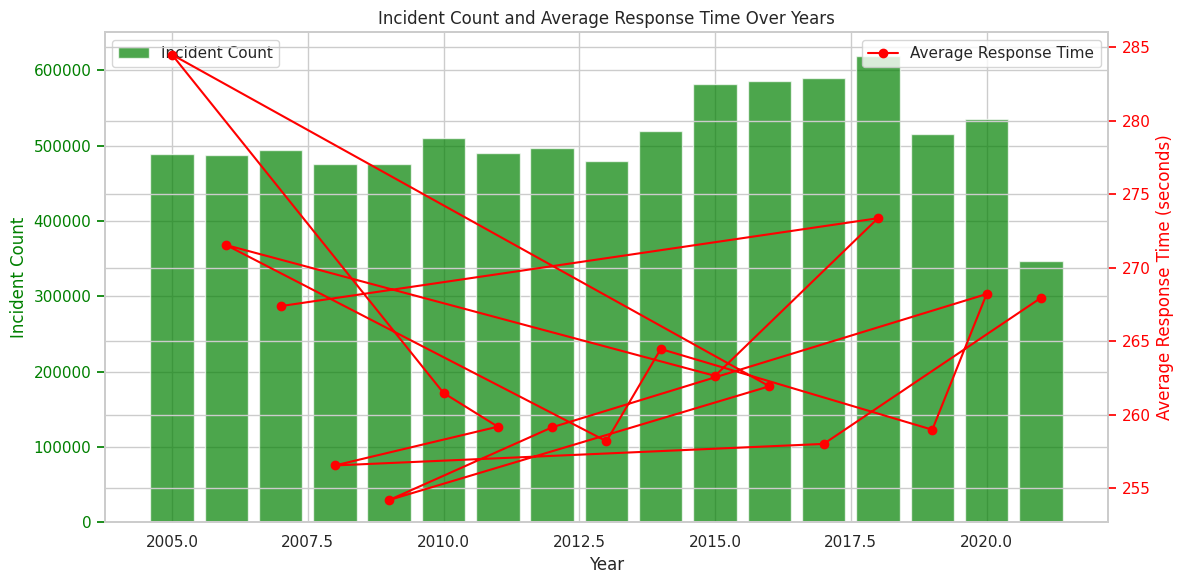

In [32]:
import matplotlib.pyplot as plt

incident_trends_pd = incident_trends.toPandas()

# Create a single plot with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot incident count on the first y-axis
ax1.bar(incident_trends_pd['year'], incident_trends_pd['incident_count'], color='green', alpha=0.7, label='Incident Count')
ax1.set_xlabel('Year')
ax1.set_ylabel('Incident Count', color='green')
ax1.tick_params('y', colors='green')

# Create a secondary y-axis for average response time
ax2 = ax1.twinx()
ax2.plot(incident_trends_pd['year'], incident_trends_pd['avg_response_time_seconds'], color='red', marker='o', label='Average Response Time')
ax2.set_ylabel('Average Response Time (seconds)', color='red')
ax2.tick_params('y', colors='red')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Incident Count and Average Response Time Over Years')
plt.tight_layout()
plt.show()


The graph above shows the trends in incident count and average response time over the years.



##The top five incidents in each borough based on alarm box location.


In [33]:
from pyspark.sql.functions import desc,row_number

# Group by borough and alarm box location, then aggregate incident counts
top_spots_per_borough = df_fire.groupBy("INCIDENT_BOROUGH", "ALARM_BOX_LOCATION") \
    .agg(count("*").alias("incident_count")) \
    .sort("incident_count", ascending=False)

# Use row_number() to rank spots within each borough
window_spec = Window.partitionBy("INCIDENT_BOROUGH").orderBy(desc("incident_count"))
ranked_spots_per_borough = top_spots_per_borough.withColumn("rank", row_number().over(window_spec))

# Filter for the top 5 spots in each borough
top_5_spots_per_borough = ranked_spots_per_borough.filter("rank <= 5")

# Show the top 5 spots for each borough
top_5_spots_per_borough.show()



+----------------+--------------------+--------------+----+
|INCIDENT_BOROUGH|  ALARM_BOX_LOCATION|incident_count|rank|
+----------------+--------------------+--------------+----+
|           BRONX|      3 AVE & 143 ST|         11020|   1|
|           BRONX|OPP 10 RICHMAN PL...|          8431|   2|
|           BRONX|WASHINGTON AVE & ...|          8394|   3|
|           BRONX|CONCOURSE VILLAGE...|          7774|   4|
|           BRONX|CASTLE HILL & RAN...|          7615|   5|
|        BROOKLYN|MYRTLE AVE & THRO...|          6091|   1|
|        BROOKLYN|FLATBUSH AVE & 4 AVE|          5167|   2|
|        BROOKLYN|ST. MARKS & TROY ...|          4709|   3|
|        BROOKLYN|DUMONT AV-500' E....|          4585|   4|
|        BROOKLYN|LAFAYETTE AVE & C...|          4361|   5|
|       MANHATTAN|      8 AVE & 155 ST|         13370|   1|
|       MANHATTAN|      5 AVE & 112 ST|          8859|   2|
|       MANHATTAN|     8 AVE & W 41 ST|          8367|   3|
|       MANHATTAN|LEXINGTON AV & E ...| 

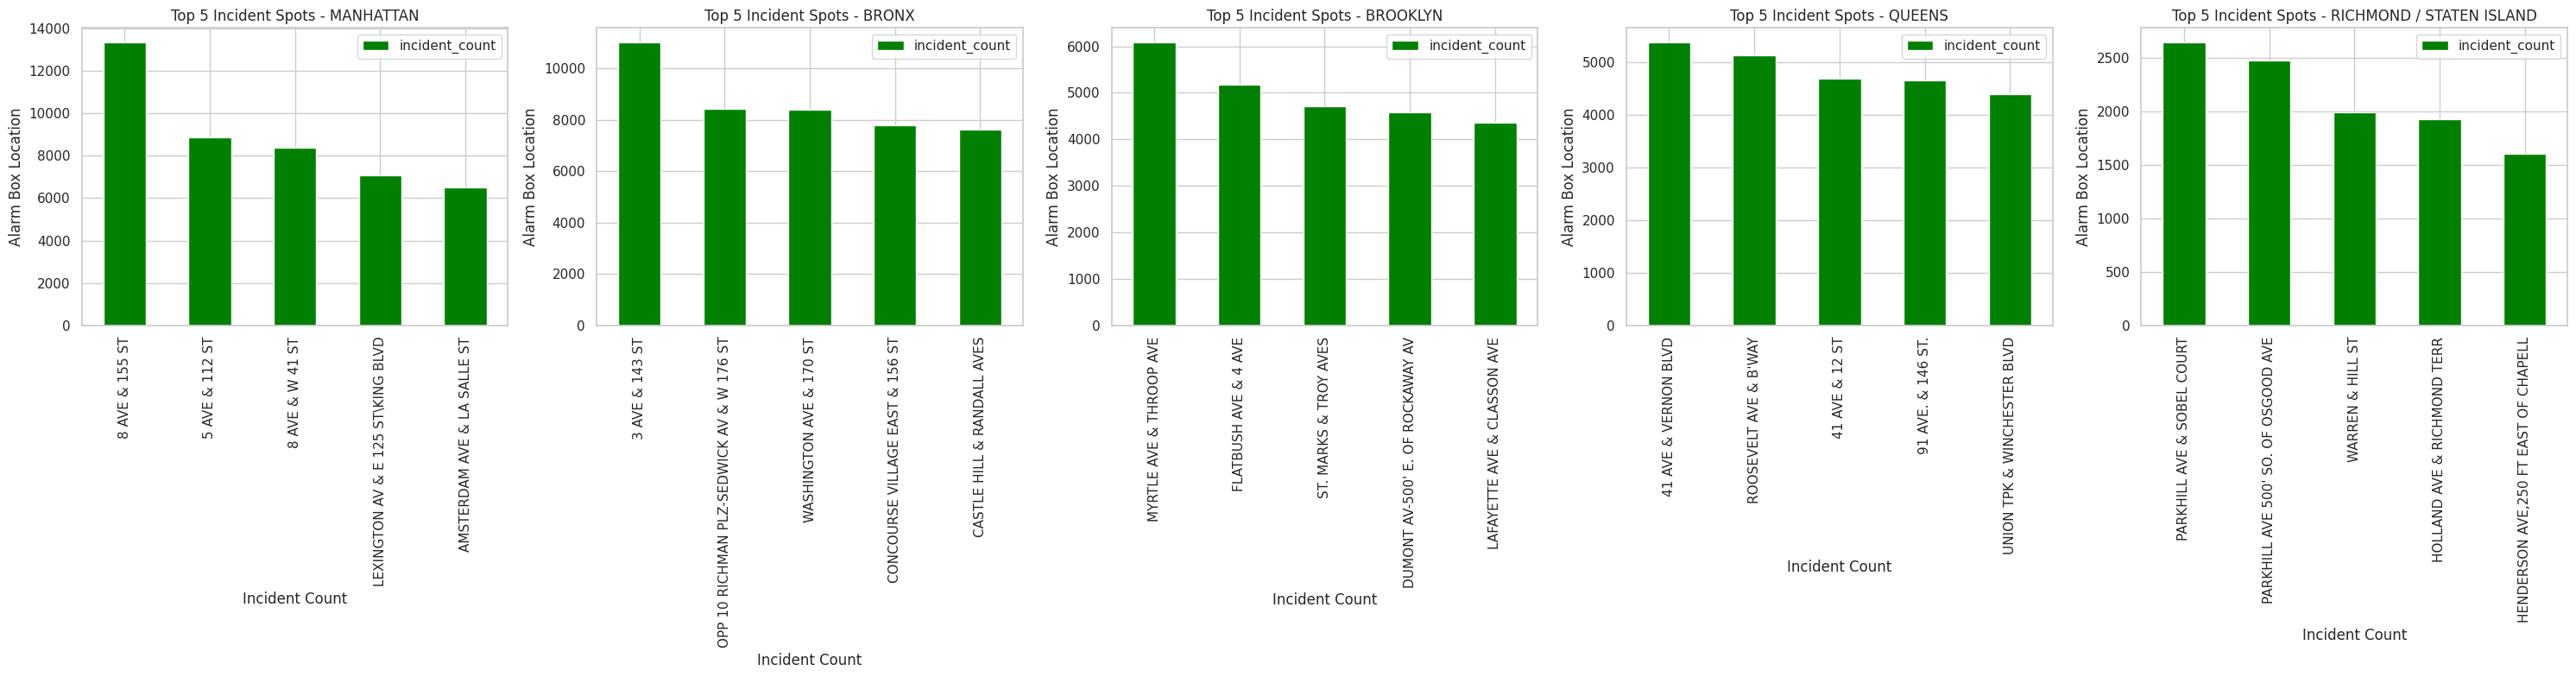

In [34]:
import matplotlib.pyplot as plt
import pandas as pd


top_spots_pd = top_spots_per_borough.toPandas()

# Get unique boroughs
boroughs = top_spots_pd['INCIDENT_BOROUGH'].unique()


fig, axs = plt.subplots(ncols=len(boroughs), figsize=(6 * len(boroughs), 8))

for i, borough in enumerate(boroughs):
    # Filter data for the current borough and get top 5 incidents
    borough_data = top_spots_pd[top_spots_pd['INCIDENT_BOROUGH'] == borough].head(5)

    # Plot horizontal bar chart for the current borough
    ax = axs[i]
    borough_data.plot(kind='bar', y='incident_count', x='ALARM_BOX_LOCATION', ax=ax, color='green')
    ax.set_title(f'Top 5 Incident Spots - {borough}')
    ax.set_xlabel('Incident Count')
    ax.set_ylabel('Alarm Box Location')


plt.tight_layout()

plt.show()


The graphs above represent the top five incidents in each borough based on alarm box location.



## Unit Assign analysis

In [35]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Calculate the total count of assigned units for each incident type
unit_assignment_analysis = df_fire.groupBy("INCIDENT_CLASSIFICATION") \
    .agg(
        sum(col("ENGINES_ASSIGNED_QUANTITY")).alias("Total_Engines_Assigned"),
        sum(col("LADDERS_ASSIGNED_QUANTITY")).alias("Total_Ladders_Assigned"),
        sum(col("OTHER_UNITS_ASSIGNED_QUANTITY")).alias("Total_Other_Units_Assigned")
    ) \
    .orderBy("INCIDENT_CLASSIFICATION")

unit_assignment_analysis.show(truncate=False)


+-------------------------------------------------+----------------------+----------------------+--------------------------+
|INCIDENT_CLASSIFICATION                          |Total_Engines_Assigned|Total_Ladders_Assigned|Total_Other_Units_Assigned|
+-------------------------------------------------+----------------------+----------------------+--------------------------+
|Abandoned Derelict Vehicle Fire                  |2704                  |2380                  |424                       |
|Alarm System - Defective                         |378971                |289622                |178264                    |
|Alarm System - Other                             |1719                  |1262                  |694                       |
|Alarm System - Recorded                          |1066                  |768                   |414                       |
|Alarm System - Testing                           |128455                |99978                 |58256                     |


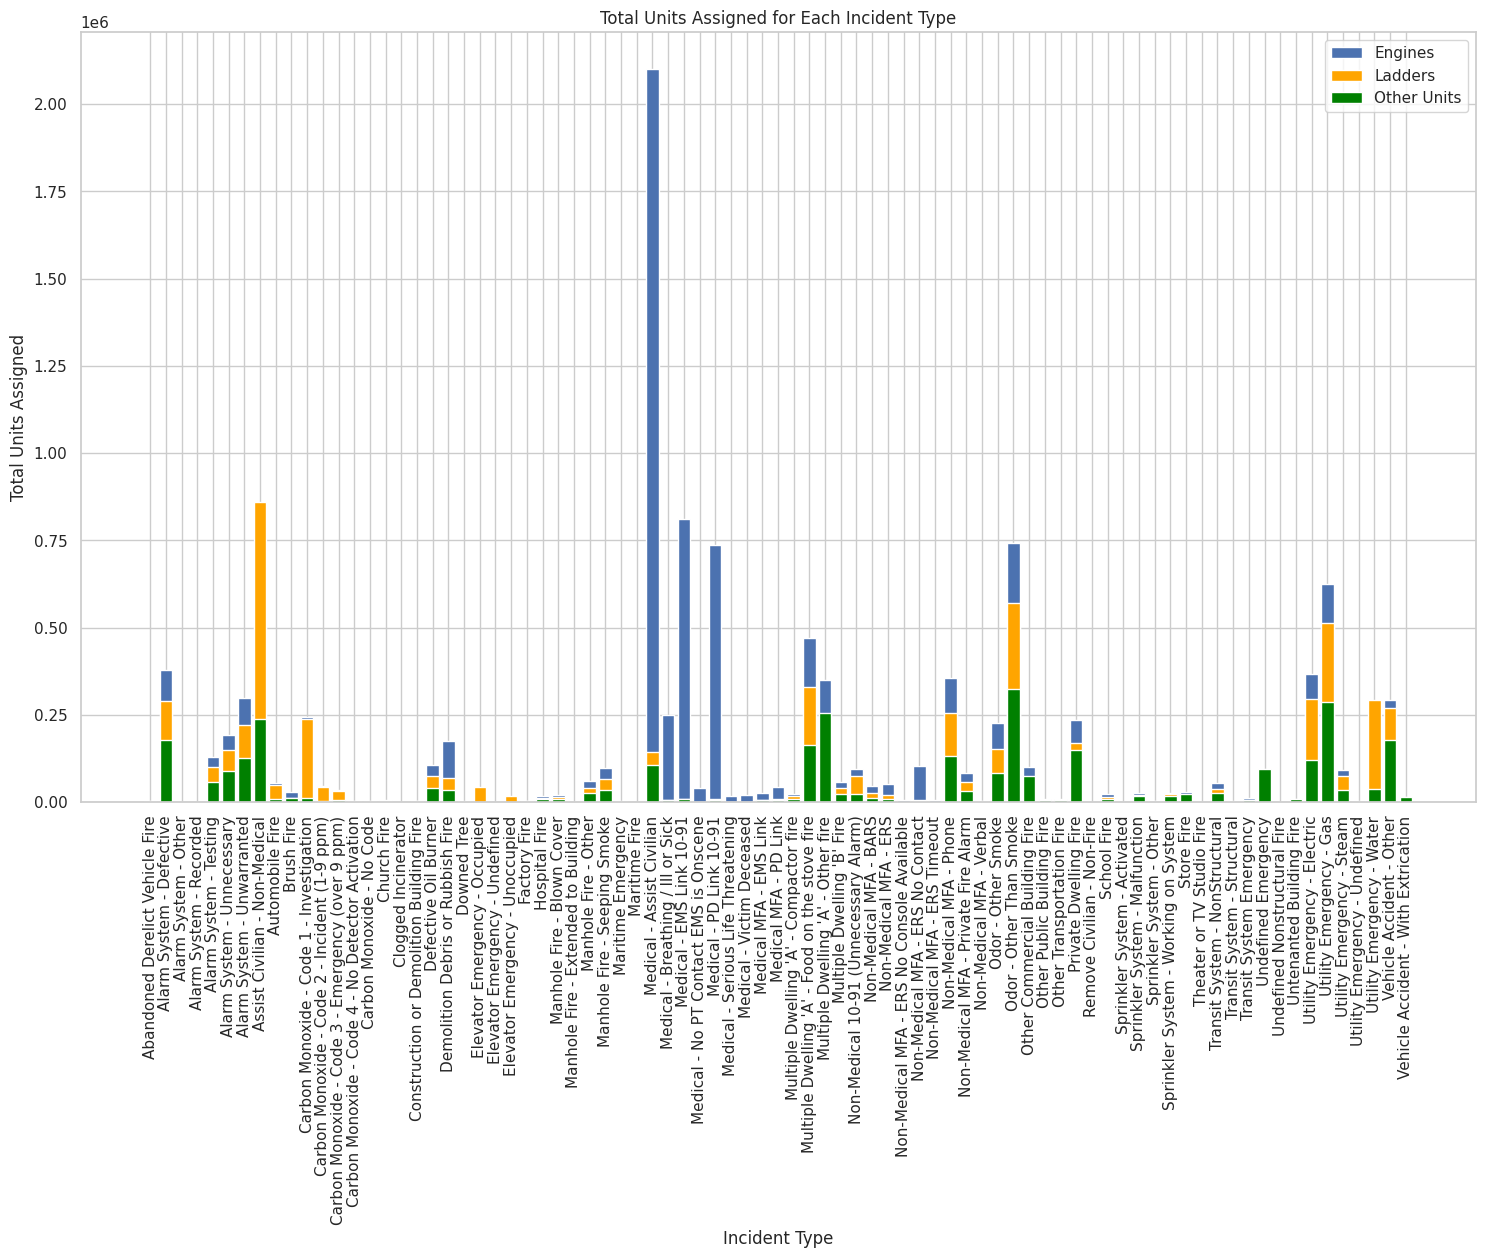

In [36]:
unit_assignment_pd = unit_assignment_analysis.toPandas()
plt.figure(figsize=(18, 10))

# Plotting for Total Engines, Ladders and other units Assigned
plt.bar(unit_assignment_pd["INCIDENT_CLASSIFICATION"], unit_assignment_pd["Total_Engines_Assigned"], label='Engines')
plt.bar(unit_assignment_pd["INCIDENT_CLASSIFICATION"], unit_assignment_pd["Total_Ladders_Assigned"], color='orange', label='Ladders')
plt.bar(unit_assignment_pd["INCIDENT_CLASSIFICATION"], unit_assignment_pd["Total_Other_Units_Assigned"], color='green', label='Other Units')

plt.title("Total Units Assigned for Each Incident Type")
plt.xlabel("Incident Type")
plt.ylabel("Total Units Assigned")
plt.xticks(rotation=90)
plt.legend()
plt.show()


We can see from the graph above that Assist Civilian - Non-Medical appears to be one of the most common incident types.

